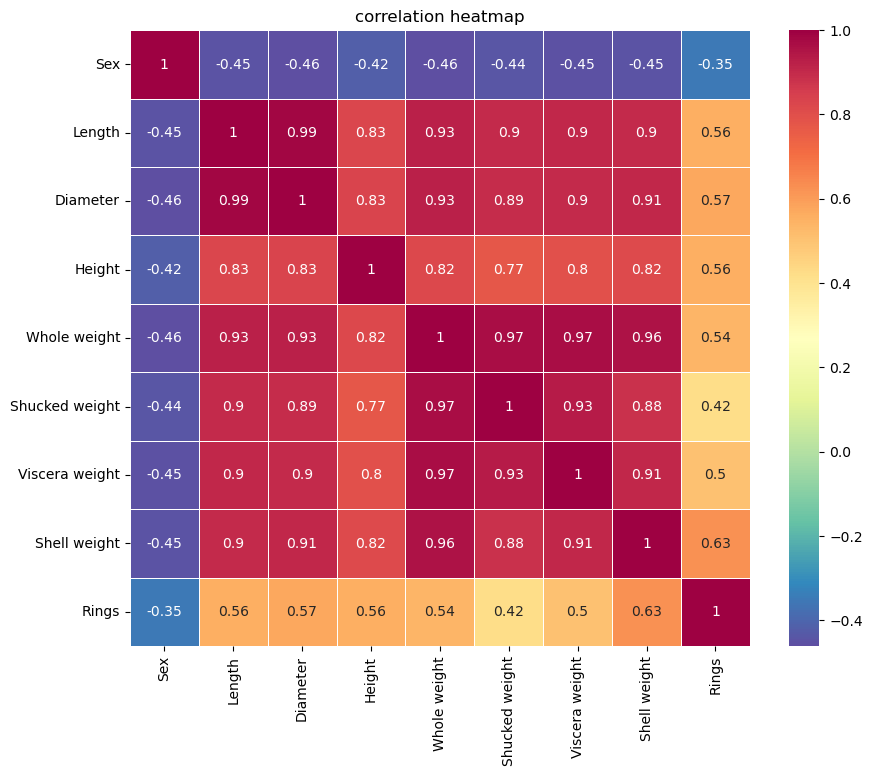

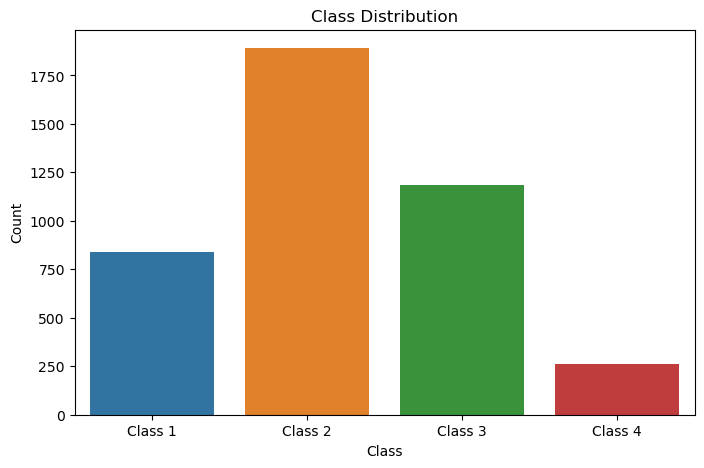

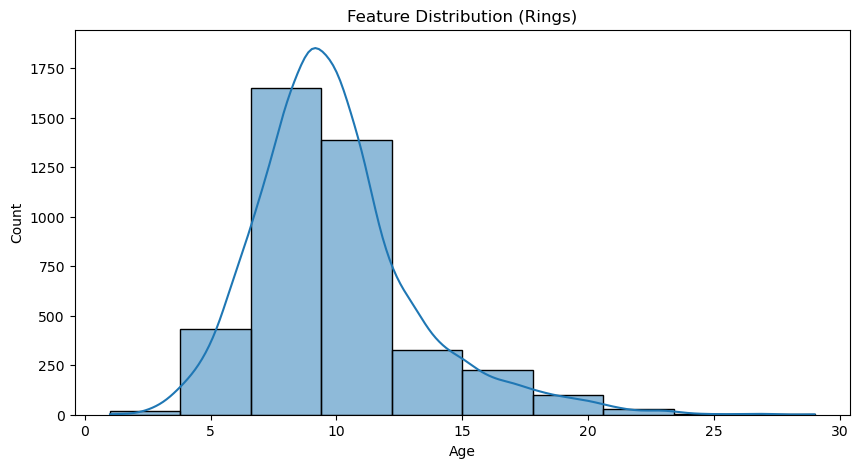

class
Class 1     839
Class 2    1891
Class 3    1186
Class 4     261
dtype: int64


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,class
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,Class 3
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Class 1
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,Class 2
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,Class 2
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Class 1
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,Class 3
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,Class 2
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,Class 2
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,Class 2


In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from colorama import Fore, Back , Style
import statistics

with open('abalone.txt', 'r') as file:
    column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
    data = pd.read_csv(file, names=column_names, delimiter=',')
    
#mapping sex to the numbers
data['Sex'] = data['Sex'].map({'M' : 0, 'F' : 1, 'I' : 2})

# heatmap
correlation_map_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_map_matrix, annot = True, cmap = 'Spectral_r', linewidths = 0.5)
plt.title('correlation heatmap')
plt.show()

# Define class boundaries
class_boundaries = [-1, 7, 10, 15, 30]

# Assign classes based on age
data['class'] = pd.cut(data['Rings'], bins=class_boundaries, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# Distribution of classes
class_distribution = data['class'].value_counts()

# Distribution of features (age)
feature_distribution = data['Rings'].value_counts()

# Visualization of class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=data, order=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Visualization of feature distribution (age)
plt.figure(figsize=(10, 5))
sns.histplot(data['Rings'], bins=10, kde=True)
plt.title('Feature Distribution (Rings)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()
print(data.groupby('class').size())
data
#A1

In [189]:
# two of height values are 0, give them a new value as the means
data[data['Height'] == 0]
mean_height = np.mean(data['Height'])
data['Height'] = data['Height'].replace(0,mean_height)
data
# data[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,class
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,Class 3
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Class 1
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,Class 2
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,Class 2
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Class 1
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,Class 3
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,Class 2
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,Class 2
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,Class 2


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


best number of neuron:  20
rmse mean:  2.5477155335555834
95% confindence interval: 2.5278270133851994, 2.5676040537259675


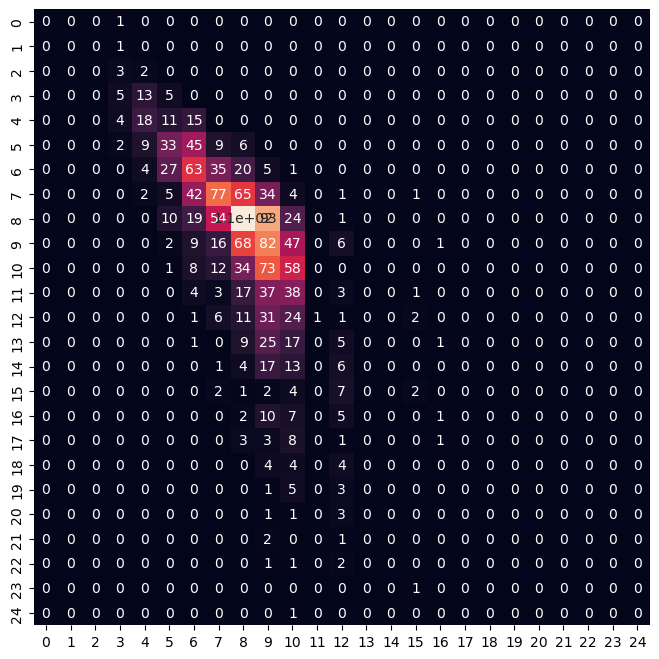

In [209]:
#2
x = data.drop(['Rings', 'class'], axis=1)
y = data['Rings']

best_rmse = float('inf')
best_number_hidden_neuron_rmse = {}
best_neuron = 0
rmse_list = []

number_hidden_neurons = [5, 10, 15, 20]

# learning is from ass2, best learning rate
for i in range(10):
    for number in number_hidden_neurons:
        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
        
        # Scale the features using MinMaxScaler
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        model_nn = MLPClassifier(hidden_layer_sizes=(number,), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1000, alpha=0.01)
        model_nn.fit(x_train_scaled, y_train)
        y_test_nn = model_nn.predict(x_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_test_nn))
        rmse_list.append(rmse)
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_neuron = number
            best_number_hidden_neuron_rmse = {'number': number, 'RMSE': rmse}

best_number_hidden_neuron_rmse

mean_rmse = np.mean(rmse_list)
std_dev = np.std(rmse_list)

alpha = 0.05
z_score = 1.96

lower_limit = mean_rmse - (z_score * (std_dev / np.sqrt(len(rmse_list))))
upper_limit = mean_rmse + (z_score * (std_dev / np.sqrt(len(rmse_list))))

print('best number of neuron: ', number)
print('rmse mean: ', mean_rmse)
print(f'95% confindence interval: {lower_limit}, {upper_limit}')

cm = confusion_matrix(y_test, y_test_nn)
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.show()

# {'number': 20, 'RMSE': 2.4933184201911303}
# best_number_hidden_neuron_rmse
# {'number': 20, 'RMSE': 2.5257500915243827}
# {'number': 10, 'RMSE': 2.51981970040742}
# {'number': 15, 'RMSE': 2.5133991613162694} range 3
# {'number': 10, 'RMSE': 2.479840924609971}  range 30

# {'number': 15, 'RMSE': 2.437611726175494}  relu
# {'number': 15, 'RMSE': 2.4310971583171535} relu -> convergence in third round
# {'number': 15, 'RMSE': 2.4310971583171535} relu -> convergence in third round
# {'number': 20, 'RMSE': 2.413804305823132}  tanh 
# {'number': 20, 'RMSE': 2.4806854132857734} identity -> convergence early
# {'number': 15, 'RMSE': 2.462282807635139}  identity -> convergence early
# {'number': 20, 'RMSE': 2.4794789128431787} identity -> convergence early

#best number of neuron:  20
#rmse mean:  2.551101329219123
#95% confindence interval: 2.534345619780197, 2.5678570386580493

In [213]:
#3
lr_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
best_lr = 0
rmse_list = []
best_learning_rate_rmse = None
lr_dict = {}
best_rmse = 100
best_lr = 0

# best number of hidden neuron from the previous question
for i in range(10):
    for value in lr_list:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        model_nn = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='sgd', learning_rate_init=value, max_iter=1000, alpha=0.01)
        model_nn.fit(x_train_scaled, y_train)
        y_test_nn = model_nn.predict(x_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_test_nn))
        rmse_list.append(rmse)
        lr_dict[value] = rmse

        # if best_learning_rate_rmse is None or rmse < best_learning_rate_rmse['RMSE']:
        #     best_learning_rate_rmse = {'learning rate': value, 'RMSE': rmse}
        #     best_lr = value
            
mean_rmse = np.mean(rmse_list)
std_dev = np.std(rmse_list)

alpha = 0.05
z_score = 1.96

lower_limit = mean_rmse - (z_score * (std_dev / np.sqrt(len(rmse_list))))
upper_limit = mean_rmse + (z_score * (std_dev / np.sqrt(len(rmse_list))))
for key,value in lr_dict.items():
    if value < lower_limit or value > upper_limit:
        vaue = 1000
        if value < best_rmse:
            best_lr = key
            best_rmse = value


print(f'best learning rate: {best_lr}, rmse: {best_rmse}')
print('rmse mean: ', mean_rmse)
print(f'95% confindence interval: {lower_limit}, {upper_limit}')

# {'learning rate': 0.05, 'RMSE': 2.420859875623278}
# {'learning rate': 0.05, 'RMSE': 2.5517973389136714}
# {'learning rate': 0.05, 'RMSE': 2.422960190794711} final

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multil

best learning rate: 0.1, rmse: 2.4760975840948802
rmse mean:  2.607635006091377
95% confindence interval: 2.566590366555312, 2.6486796456274417


In [214]:
#4
best_rmse = float('inf')
best_number_hidden_layers_rmse = {}
best_layer = 0
rmse_list = []
best_rmse = float('inf')

for i in range(10):
    for num_layers in [1, 2, 3, 4]:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        model_nn = MLPClassifier(hidden_layer_sizes=(20,) * num_layers, activation='relu', solver='sgd', learning_rate_init=0.1, max_iter=1000, alpha=0.01)
        model_nn.fit(x_train_scaled, y_train)
        y_test_nn = model_nn.predict(x_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_test_nn))
        best_number_hidden_layers_rmse[num_layers] = rmse
        rmse_list.append(rmse)
        if  best_rmse > rmse:
            best_rmse = rmse
            best_layer = num_layers
        

best_number_hidden_layers_rmse

mean_rmse = np.mean(rmse_list)
std_dev = np.std(rmse_list)

alpha = 0.05
z_score = 1.96

lower_limit = mean_rmse - (z_score * (std_dev / np.sqrt(len(rmse_list))))
upper_limit = mean_rmse + (z_score * (std_dev / np.sqrt(len(rmse_list))))

print(best_number_hidden_layers_rmse)
print('best layer', best_layer)
print('rmse mean: ', mean_rmse)
print(f'95% confindence interval: {lower_limit}, {upper_limit}')

{1: 2.347949434501914, 2: 2.3839930998096777, 3: 2.4493675828577706, 4: 2.263862806246369}
best layer 3
rmse mean:  2.4625383346741803
95% confindence interval: 2.4235875195212406, 2.50148914982712


In [228]:
best_rmse = float('inf')
best_model_with_l2 = None
rmse_list = []
best_l2 = 0

number_hidden_neurons = 10

# Try different L2 regularization strengths
l2_values = [0.0001, 0.001, 0.01, 0.1]

for i in range(10):
    for l2_strength in l2_values:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        model_nn = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='sgd', learning_rate_init=0.1, max_iter=1000, alpha=l2_strength)  # L2 regularization strength
        model_nn.fit(x_train_scaled, y_train)
        y_test_nn = model_nn.predict(x_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_test_nn))
        rmse_list.append(rmse)
        if rmse < best_rmse:
            best_rmse = rmse
            best_model_with_l2 = {'L2 Strength': l2_strength, 'RMSE': rmse}
            best_l2 = l2_strength

mean_rmse = np.mean(rmse_list)
std_dev = np.std(rmse_list)

alpha = 0.05
z_score = 1.96

lower_limit = mean_rmse - (z_score * (std_dev / np.sqrt(len(rmse_list))))
upper_limit = mean_rmse + (z_score * (std_dev / np.sqrt(len(rmse_list))))


print(best_model_with_l2)
print('best L2', best_l2)
print('rmse mean: ', mean_rmse)
print(f'95% confindence interval: {lower_limit}, {upper_limit}')
#{'L2 Strength': 0.0001, 'RMSE': 2.4312202362647484}


{'L2 Strength': 0.001, 'RMSE': 2.3198722596335677}
best L2 0.001
rmse mean:  2.501535589706338
95% confindence interval: 2.4735351880037912, 2.529535991408885


In [419]:
# Initialize variables to track results for Adam and SGD
best_rmse_adam = float('inf')
best_rmse_sgd = float('inf')
best_model_adam = None
best_model_sgd = None
adam_rmse_list = []
sgd_rmse_list = []
number_hidden_neurons = 10  # Use the optimal number of hidden neurons

# Train and evaluate models using Adam and SGD optimizers
optimizer_list = ['adam', 'sgd']

for i in range(10):
    for optimizer in optimizer_list:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        model_nn = MLPClassifier(hidden_layer_sizes=(20,20,), activation='relu', solver=optimizer, learning_rate_init=0.1, max_iter=1000, alpha=0.01)
        model_nn.fit(x_train_scaled, y_train)
        y_test_nn = model_nn.predict(x_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_test_nn))
        

        if optimizer == 'adam':
            adam_rmse_list.append(rmse)
            if rmse < best_rmse_adam:
                best_rmse_adam = rmse
                best_model_adam = model_nn

        if optimizer == 'sgd':
            sgd_rmse_list.append(rmse)
            if rmse < best_rmse_sgd:
                best_rmse_sgd = rmse
                best_model_sgd = model_nn

adam_mean_rmse = np.mean(adam_rmse_list)
sgd_mean_rmse = np.mean(sgd_rmse_list)
adam_std_dev = np.std(adam_rmse_list)
sgd_std_dev = np.std(sgd_rmse_list)

alpha = 0.05
z_score = 1.96

adam_lower_limit = adam_mean_rmse - (z_score * (adam_std_dev / np.sqrt(len(adam_rmse_list))))
sgd_lower_limit = sgd_mean_rmse - (z_score * (sgd_std_dev / np.sqrt(len(sgd_rmse_list))))
adam_upper_limit = adam_mean_rmse + (z_score * (adam_std_dev / np.sqrt(len(adam_rmse_list))))
sgd_upper_limit = sgd_mean_rmse + (z_score * (sgd_std_dev / np.sqrt(len(sgd_rmse_list))))

print('adam rmse mean: ', adam_mean_rmse)
print('agd rmse mean: ', sgd_mean_rmse)
print(f'adam 95% confindence interval: {adam_lower_limit}, {adam_upper_limit}')
print(f'sgd 95% confindence interval: {sgd_lower_limit}, {sgd_upper_limit}')
# print(adam_rmse_list)
# print(sgd_rmse_list)
#(2.5124465749029317, 2.4738004788374406)

adam rmse mean:  2.4694749120671604
agd rmse mean:  2.4656748499138503
adam 95% confindence interval: 2.379862579177912, 2.559087244956409
sgd 95% confindence interval: 2.389307185770573, 2.5420425140571274


In [257]:
def classify_rings(rings):
    if rings <= 7:
        return 1  # Class 1
    if 7 < rings <= 10:
        return 2  # Class 2
    if 10 < rings <= 15:
        return 3  # Class 3
    else:
        return 4  # class4

Classification Accuracy: 64.3926%
Confusion Matrix:


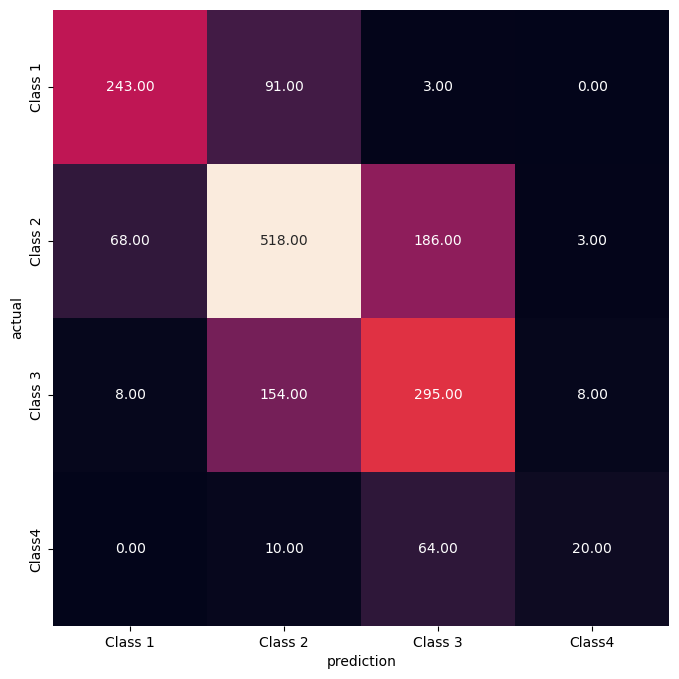

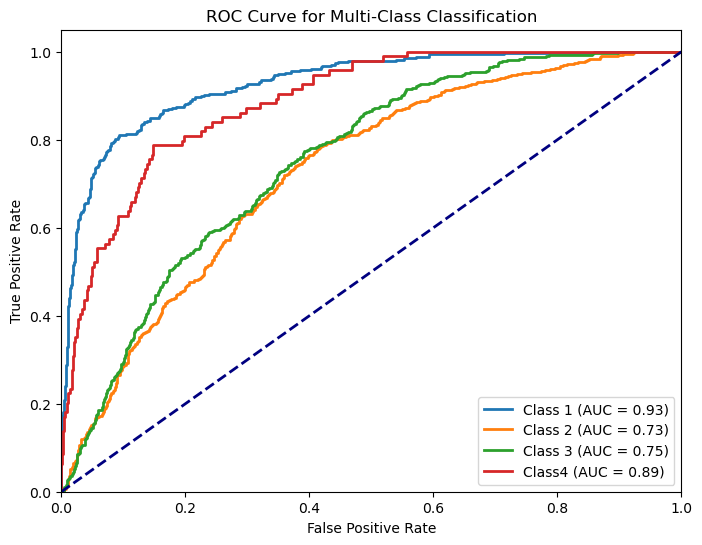

In [329]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model_nn = MLPClassifier(hidden_layer_sizes=(20,20,), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=10000, alpha=0.001)
model_nn.fit(x_train_scaled, y_train)
y_pred = model_nn.predict(x_test_scaled)

# accuracy score
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)
y_train_classified = y_train.apply(classify_rings)
y_test_classified = y_test.apply(classify_rings)
y_pred_classified = y_pred.apply(classify_rings)
accuracy = accuracy_score(y_test_classified, y_pred_classified)*100
print(f"Classification Accuracy: {accuracy:.4f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_test_classified, y_pred_classified)
print("Confusion Matrix:")
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion, square=True, annot=True, cbar=False, fmt='.2f')
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class4']
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

y_train_bin = label_binarize(y_train_classified, classes=[1, 2, 3, 4])
y_test_bin = label_binarize(y_test_classified, classes=[1, 2, 3, 4])

# Train a classifier for ROC/AUC analysis
classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
classifier.fit(x_train, y_train_bin)

# Calculate ROC and AUC for each class
y_score = classifier.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

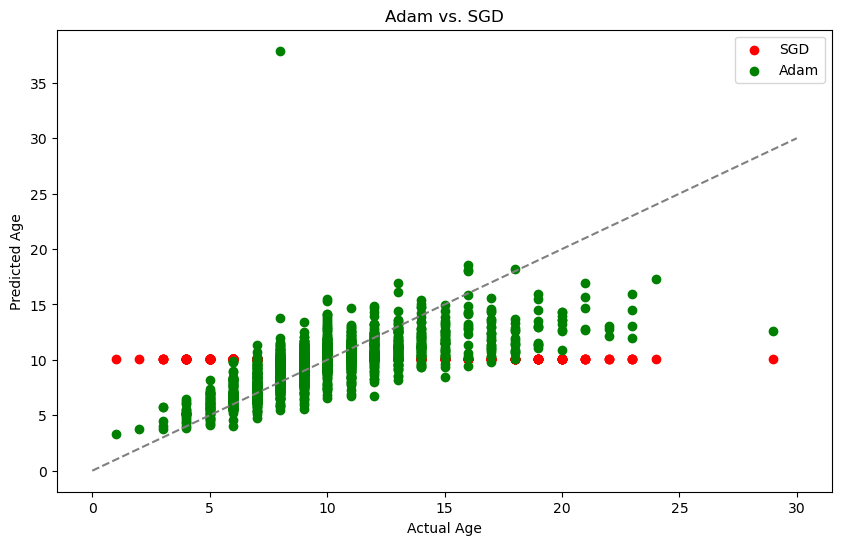

Adam RMSE mean: 2.2186211188405274
Adam 95% confidence interval: 2.159920307726752, 2.2773219299543026
SGD RMSE mean: 3.254061902741207
SGD 95% confidence interval: 3.221995191963703, 3.2861286135187115


In [372]:
from sklearn.metrics import mean_squared_error

# Initialize lists to store RMSE results
rmse_list_adam = []
rmse_list_sgd = []
optimizer_list = ['adam', 'sgd']

for i in range(10):
    for optimizer in optimizer_list:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        model = MLPRegressor(hidden_layer_sizes=(20,20,), activation='relu', solver=optimizer, learning_rate_init=0.1, max_iter=10000, alpha=0.0001)
        model.fit(x_train_scaled, y_train)
        
        
        if optimizer == 'adam':
            y_pred_adam = model.predict(x_test_scaled)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_adam))
            rmse_list_adam.append(rmse)
        if optimizer == 'sgd':
            y_pred_sgd = model.predict(x_test_scaled)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
            rmse_list_sgd.append(rmse)

z_score = 1.96
mean_rmse_adam = np.mean(rmse_list_adam)
std_dev_adam = np.std(rmse_list_adam)
mean_rmse_sgd = np.mean(rmse_list_sgd)
std_dev_sgd = np.std(rmse_list_sgd)

lower_limit_adam = mean_rmse_adam - (z_score * (std_dev_adam / np.sqrt(len(rmse_list_adam))))
upper_limit_adam = mean_rmse_adam + (z_score * (std_dev_adam / np.sqrt(len(rmse_list_adam))))
lower_limit_sgd = mean_rmse_sgd - (z_score * (std_dev_sgd / np.sqrt(len(rmse_list_sgd))))
upper_limit_sgd = mean_rmse_sgd + (z_score * (std_dev_sgd / np.sqrt(len(rmse_list_sgd))))



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd, color='red', label='SGD')
plt.scatter(y_test, y_pred_adam, color='green', label='Adam')
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Adam vs. SGD')
plt.legend()
plt.show()

print('Adam RMSE mean:', mean_rmse_adam)
print(f'Adam 95% confidence interval: {lower_limit_adam}, {upper_limit_adam}')
print('SGD RMSE mean:', mean_rmse_sgd)
print(f'SGD 95% confidence interval: {lower_limit_sgd}, {upper_limit_sgd}')



Loss of MLPClassifier [2.240343445987883, 2.427661564109886, 2.2559508404611464, 2.315870362435562]
Loss of MLPRegressor [1.9963110713480705, 2.0788348411794857, 2.1550084639002733, 2.1506199358221427]
MLPClassifier RMSE mean: 2.309956553248619
MLPRegressor RMSE mean: 2.095193578062493


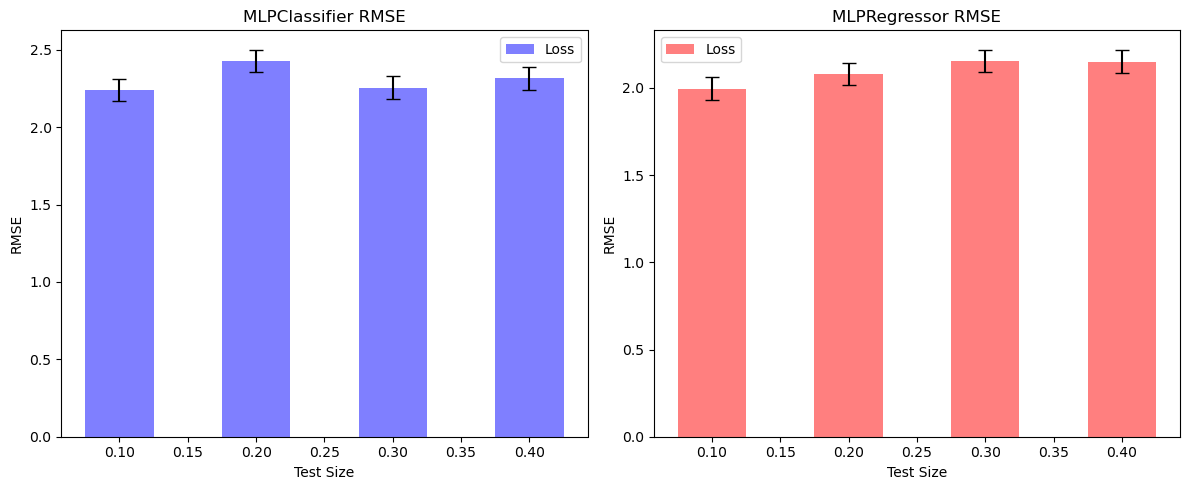

In [387]:
from sklearn.metrics import mean_squared_error

reg_loss = []
class_loss = []
optimizer_list = ['adam', 'sgd']
test_list = [0.1, 0.2, 0.3, 0.4]

for i in test_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=88)
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    model_reg = MLPClassifier(hidden_layer_sizes=(20, 20,), activation='relu', solver='adam', learning_rate_init=0.1, max_iter=1000, alpha=0.0001)
    model_reg.fit(x_train_scaled, y_train)

    y_test_adam = model_reg.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_adam))
    class_loss.append(rmse)

class_rmse = np.mean(class_loss)
class_std = np.std(class_loss)

for i in test_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=88)
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    model_reg = MLPRegressor(hidden_layer_sizes=(20, 20,), activation='relu', solver='adam', learning_rate_init=0.1, max_iter=1000, alpha=0.0001)
    model_reg.fit(x_train_scaled, y_train)

    y_test_adam = model_reg.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_adam))
    reg_loss.append(rmse)

reg_rmse = np.mean(reg_loss)
reg_std = np.std(reg_loss)

z_score = 1.96
                                   
class_lower_limit = class_rmse - (z_score * (class_std / np.sqrt(len(class_loss))))
class_upper_limit = class_rmse + (z_score * (class_std / np.sqrt(len(class_loss))))                           
reg_lower_limit = reg_rmse - (z_score * (reg_std / np.sqrt(len(reg_loss))))
reg_upper_limit = reg_rmse + (z_score * (reg_std / np.sqrt(len(reg_loss))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# MLPClassifier results
ax1.bar(test_list, class_loss, width=0.05, label='Loss', color='b', alpha=0.5, yerr=class_std, capsize=5)
ax1.set_title('MLPClassifier RMSE')
ax1.set_xlabel('Test Size')
ax1.set_ylabel('RMSE')
ax1.legend()

# MLPRegressor results
ax2.bar(test_list, reg_loss, width=0.05, label='Loss', color='r', alpha=0.5, yerr=reg_std, capsize=5)
ax2.set_title('MLPRegressor RMSE')
ax2.set_xlabel('Test Size')
ax2.set_ylabel('RMSE')
ax2.legend()

print('Loss of MLPClassifier', class_loss)
print('Loss of MLPRegressor', reg_loss)
print('MLPClassifier RMSE mean:', class_rmse)
print('MLPRegressor RMSE mean:', reg_rmse)

plt.tight_layout()
plt.show()

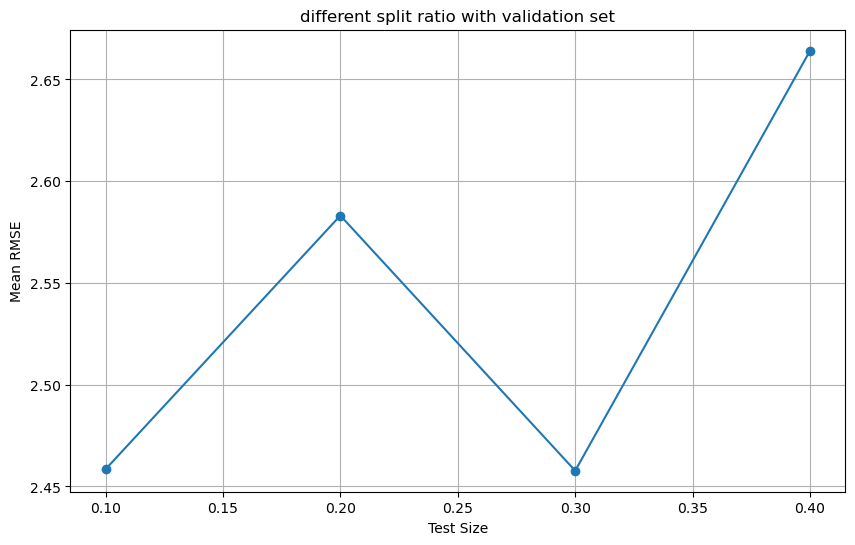

2.4584161854308495 2.583129714823444 2.4577127949948916 2.6641442023562893


In [399]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

one_loss = []
two_loss = []
three_loss = []
four_loss = []
test_list = [0.1, 0.2, 0.3, 0.4]

for i in test_list:
    for j in range(10):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=88+j)
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  # Split a validation set
        
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_val_scaled = scaler.transform(x_val)
        x_test_scaled = scaler.transform(x_test)
        model_reg = MLPClassifier(hidden_layer_sizes=(20, 20,), activation='relu', solver='adam', learning_rate_init=0.1, max_iter=1000, alpha=0.0001)

        model_reg.fit(x_train_scaled, y_train)
        y_val_pred = model_reg.predict(x_val_scaled)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        
        if i == 0.1:
            one_loss.append(rmse)
        elif i == 0.2:
            two_loss.append(rmse)
        elif i == 0.3:
            three_loss.append(rmse)
        else:
            four_loss.append(rmse)

mean_rmse_1 = np.mean(one_loss)
mean_rmse_2 = np.mean(two_loss)
mean_rmse_3 = np.mean(three_loss)
mean_rmse_4 = np.mean(four_loss)

plt.figure(figsize=(10, 6))
plt.plot(test_list, [mean_rmse_1, mean_rmse_2, mean_rmse_3, mean_rmse_4], marker='o', linestyle='-')
plt.xlabel('Test Size')
plt.ylabel('Mean RMSE')
plt.title('different split ratio with validation set')
plt.grid()
plt.show()
print(mean_rmse_1, mean_rmse_2, mean_rmse_3, mean_rmse_4)


In [408]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
ada_list = []
ada_rmse = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88+i)
    adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=88)
    adaboost_classifier.fit(X_train, y_train)
    
    y_pred = adaboost_classifier.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    ada_list.append(y_pred)
    ada_rmse.append(rmse)

mean_pred = np.mean(ada_rmse)
accuracy = accuracy_score(y_test, y_pred)
print('mean rmse: ', mean_pred)
print('accuracy: ', accuracy)

mean rmse:  3.5693378050231943
accuracy:  0.08916816277678037


In [416]:
# tuning the best parameters
import tensorflow as tf

# Define hyperparameter search ranges
dropout_rates_list = [0.1, 0.2, 0.3]
weight_decays_list = [0.001, 0.01, 0.1]

best_rmse = float('inf')
best_dropout_rate = None
best_weight_decay = None

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=80)

for dropout_rate in dropout_rates_list:
    for weight_decay in weight_decays_list:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(8,)),
            tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
            tf.keras.layers.Dense(1)  # Output layer
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=0)
        y_val_pred = model.predict(x_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        if rmse < best_rmse:
            best_rmse = rmse
            best_dropout_rate = dropout_rate
            best_weight_decay = weight_decay


print(f'Best dropout rate: {best_dropout_rate}')
print(f'Best weight decay (λ): {best_weight_decay}')


32/32 [==============================] - 0s 1ms/step
Best dropout rate: 0.1
Best weight decay (λ): 0.001


53/53 [==============================] - 0s 1ms/step


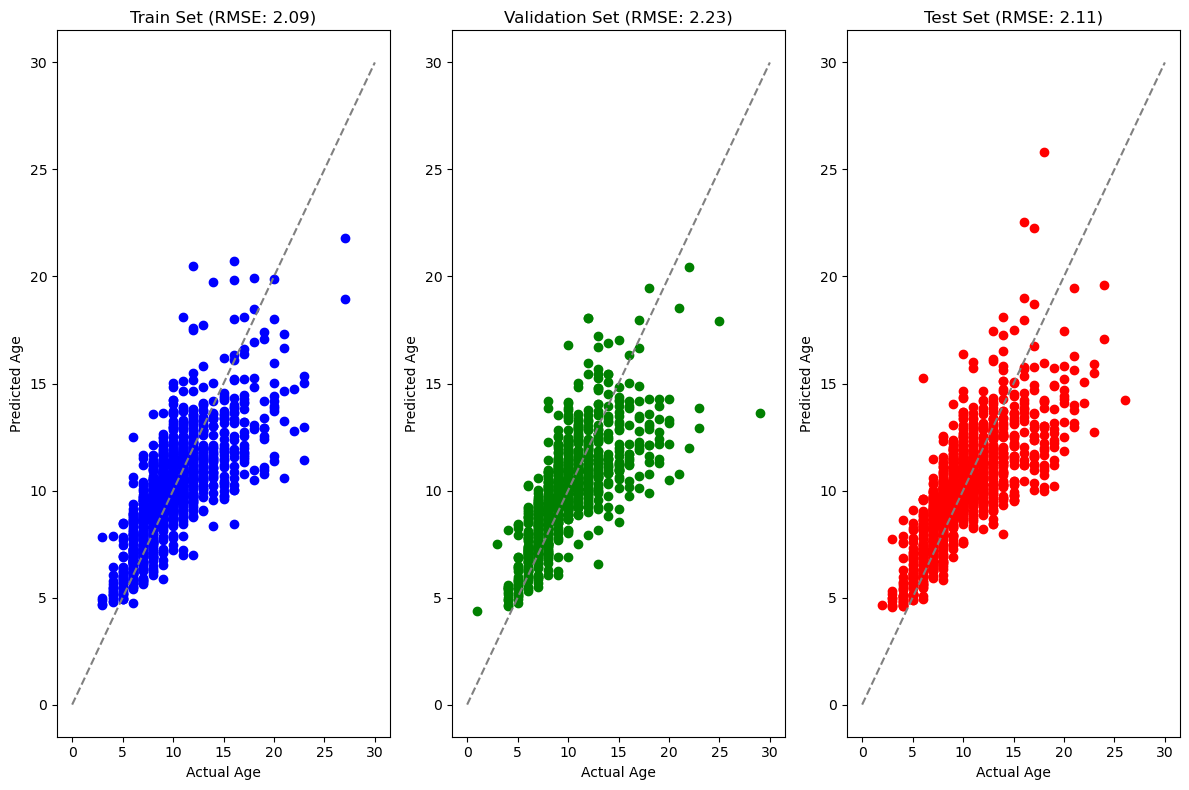

RMSE with drop out and weight decay: 2.106494024131662


In [418]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=88)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=80)

final_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)  # Output layer
])

final_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the final model on the combined training and validation sets
x_combined = np.vstack((x_train, x_val))
y_combined = np.hstack((y_train, y_val))
final_model.fit(x_combined, y_combined, epochs=100, batch_size=32, verbose=0)


y_test_pred = final_model.predict(x_test)  # Evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

y_train_pred = final_model.predict(x_train)
y_val_pred = final_model.predict(x_val)
y_test_pred = final_model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.scatter(y_train, y_train_pred, c='blue', label='Predicted')
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title(f'Train Set (RMSE: {train_rmse:.2f})')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.subplot(132)
plt.scatter(y_val, y_val_pred, c='green', label='Predicted')
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title(f'Validation Set (RMSE: {val_rmse:.2f})')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.subplot(133)
plt.scatter(y_test, y_test_pred, c='red', label='Predicted')
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title(f'Test Set (RMSE: {test_rmse:.2f})')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.tight_layout()
plt.show()
print(f'RMSE with drop out and weight decay: {test_rmse}')